# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
# Resolver acá
import os
import pandas as pd
import matplotlib
#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')
os.chdir('c:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP2/TP2')

In [5]:
airbnb = pd.read_csv('Base Airbnb NY.csv')
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)
airbnb = airbnb.drop_duplicates(subset = 'id', keep = 'first')
# Missing values: como los NaN que aparecian correspondian con que en el number_of_reviews era 0, significa que hay 0 reviews_per_months. Por lo tanto, decidimos reemplazar esos NaN por 0.
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)
airbnb = airbnb[airbnb['availability_365'] >= 0] #hicimos esto porque en el histograma de availability estaba raro porque tenia valores negativos q no tenian sentido porque disponibilidad nopuede ser neg
airbnb

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

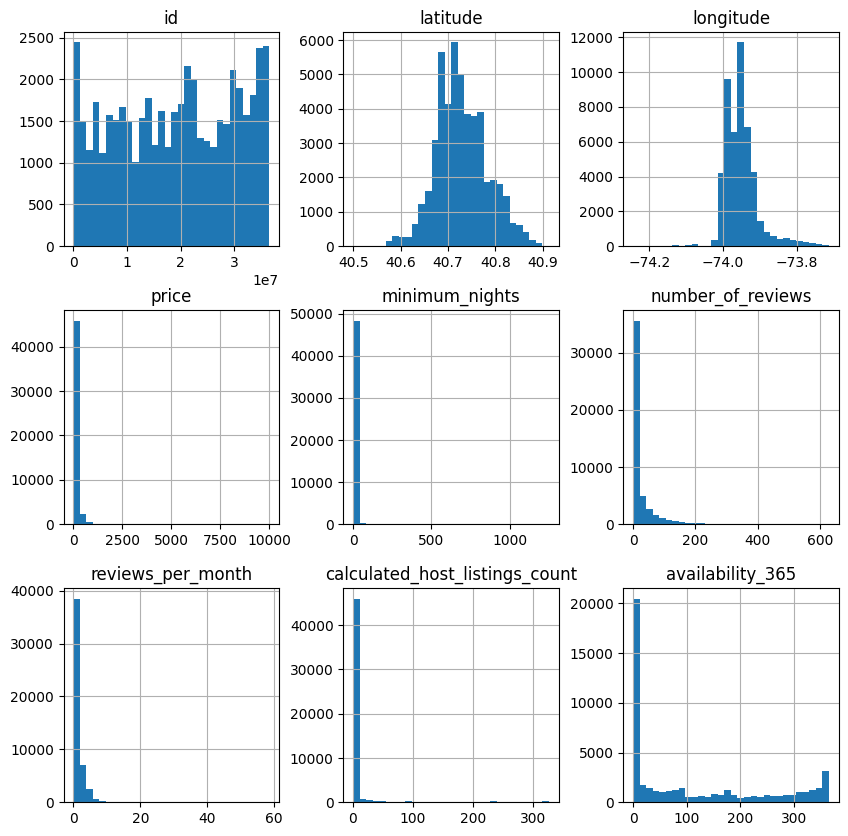

In [6]:
airbnb.hist(figsize = (10,10), bins = 30)

In [13]:
import numpy as np
#transformamos las columnas necesarias a log 
# Columnas a las que aplicar logaritmo
columnas_log = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Aplicar logaritmo a las columnas seleccionadas
airbnb[columnas_log] = np.exp(airbnb[columnas_log])
airbnb


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.610227,NaN,0.787195,NaN,0.583198,1.774935
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.689376,NaN,1.336753,NaN,NaN,1.770215
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,1.611563,0.094048,NaN,NaN,NaN,1.774935
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.501549,NaN,1.722485,0.428344,NaN,1.661624
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1.477511,0.834032,0.787195,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.446565,NaN,NaN,NaN,NaN,0.787195
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.305323,0.326634,NaN,NaN,NaN,1.276345
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,1.557077,0.834032,NaN,NaN,NaN,1.192660
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1.388126,NaN,NaN,NaN,0.583198,NaN


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

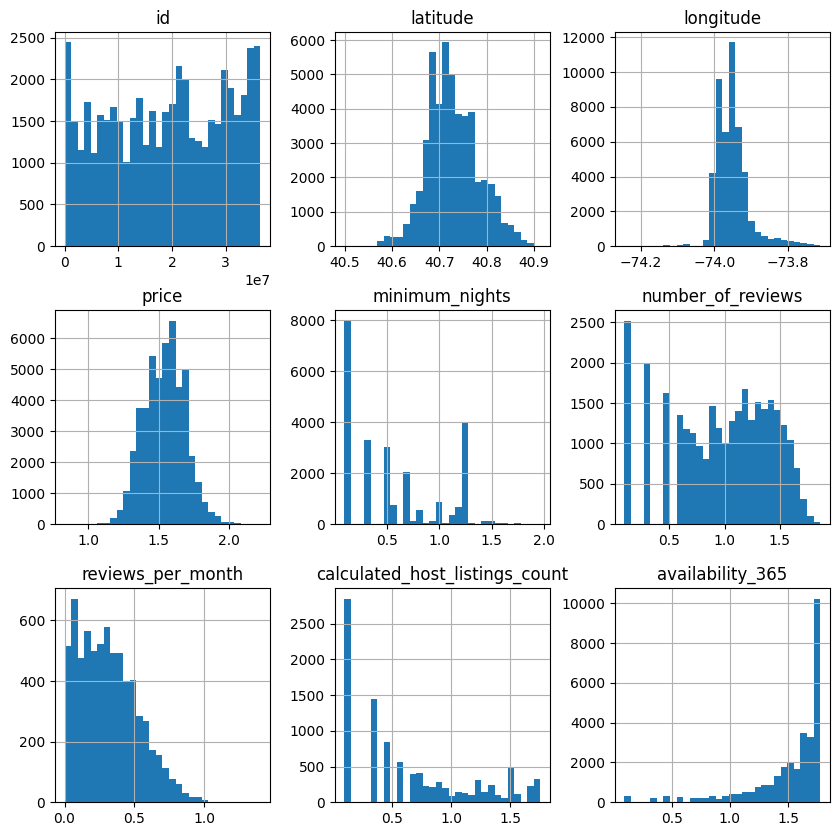

In [14]:
airbnb.hist(figsize = (10,10), bins = 30)

In [ ]:
# outliers y valores que no tienen sentido
# ya tomamos una decisione n cuanto a los negativos de availability y la fecha de de last review



 Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [20]:
#son 5 grupos de barrios y 3 tipos de cuarto

# Paso 1: Obtener los valores únicos de la columna
barrios = airbnb['neighbourhood_group'].unique()

# Paso 2: Asignar un valor numérico a cada barrio
airbnb['neighbourhood_group_num'] = pd.factorize(airbnb['neighbourhood_group'])[0]
print(barrios)

# Paso 1
cuartos = airbnb['room_type'].unique()

# Paso 2: Asignar un valor numérico 
airbnb['room_type_num'] = pd.factorize(airbnb['room_type'])[0]
print(cuartos)
airbnb


['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_num,room_type_num
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.610227,NaN,0.787195,NaN,0.583198,1.774935,0,0
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.689376,NaN,1.336753,NaN,NaN,1.770215,1,1
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,1.611563,0.094048,NaN,NaN,NaN,1.774935,1,0
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.501549,NaN,1.722485,0.428344,NaN,1.661624,0,1
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1.477511,0.834032,0.787195,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.446565,NaN,NaN,NaN,NaN,0.787195,0,0
48891,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.305323,0.326634,NaN,NaN,NaN,1.276345,0,0
48892,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,1.557077,0.834032,NaN,NaN,NaN,1.192660,1,1
48893,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1.388126,NaN,NaN,NaN,0.583198,NaN,1,2


In [23]:
#- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>
#agrupar por 'neighbourhood_group' y contar la cantidad de oferentes por cada grupo
offer_count = airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Paso 2: Hacer un merge o join con el DataFrame original para añadir la columna 'offer_group'
airbnb = airbnb.merge(offer_count, on='neighbourhood_group', how='left')
print(offer_count)
airbnb




  neighbourhood_group  offer_group
0               Bronx         1090
1            Brooklyn        20096
2           Manhattan        21659
3              Queens         5662
4       Staten Island          373


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_num,room_type_num,offer_group_x,offer_group_y
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,1.610227,NaN,0.787195,NaN,0.583198,1.774935,0,0,20096,20096
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1.689376,NaN,1.336753,NaN,NaN,1.770215,1,1,21659,21659
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,1.611563,0.094048,NaN,NaN,NaN,1.774935,1,0,21659,21659
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1.501549,NaN,1.722485,0.428344,NaN,1.661624,0,1,20096,20096
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,1.477511,0.834032,0.787195,NaN,NaN,NaN,1,1,21659,21659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48875,36484665,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.446565,NaN,NaN,NaN,NaN,0.787195,0,0,20096,20096
48876,36485057,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.305323,0.326634,NaN,NaN,NaN,1.276345,0,0,20096,20096
48877,36485431,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,1.557077,0.834032,NaN,NaN,NaN,1.192660,1,1,21659,21659
48878,36485609,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1.388126,NaN,NaN,NaN,0.583198,NaN,1,2,21659,21659


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [ ]:
# Resolver acá


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

Idea: Histograma (chequear si es por habitación en gral o por habitación dentro del neighbourhood group)

In [ ]:
# Resolver acá


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
# Resolver acá


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [1]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [1]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
